In [1]:
import pandas as pd
import numpy as np

# ham veri yükle
df = pd.read_csv("../data/raw/NFL Play by Play 2009-2016 (v3)")

# hızlı bakış
print("Shape:", df.shape)
display(df.head(5))
display(df.info())

# eksik değer analizi
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.head(20))

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/NFL Play by Play 2009-2016 (v3)'

In [2]:
import os
print(os.getcwd())  # Şu anki çalışma dizinini gösterir

/Users/enesersan/Desktop/veri_temizleme/notebooks


In [3]:
import os
os.listdir("../data/raw")

['.DS_Store', 'NflPlaybyPlay20092016.csv']

In [4]:
import pandas as pd
import numpy as np

# ham veri yükle
df = pd.read_csv("../data/raw/NflPlaybyPlay20092016.csv")

# hızlı bakış
print("Shape:", df.shape)
display(df.head(5))
display(df.info())

# eksik değer analizi
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.head(20))

/var/folders/6d/0bhm1dr14bd36_28dbswmc_m0000gn/T/ipykernel_8073/4038839582.py:5: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/NflPlaybyPlay20092016.csv")


Shape: (362447, 102)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


None

DefTwoPoint          362433
BlockingPlayer       362341
TwoPointConv         361919
ChalReplayResult     359476
RecFumbPlayer        358513
RecFumbTeam          358513
Interceptor          358387
FieldGoalDistance    354528
FieldGoalResult      354431
ExPointResult        353399
PenaltyType          347849
Timeout_Team         347538
ReturnResult         346547
PuntResult           342560
Returner             339535
PenalizedPlayer      337483
PenalizedTeam        336362
Tackler2             318045
RunGap               284605
RunLocation          256187
dtype: int64

In [5]:
# Eksik değerlerin genel durumu
print(df.isnull().sum().head(20))  # İlk 20 sütun için eksik değer sayısı

# Tüm dataset için özet
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head(10))  # En çok eksik olan ilk 10 sütun

Date                 0
GameID               0
Drive                0
qtr                  0
down             54218
time               188
TimeUnder            0
TimeSecs           188
PlayTimeDiff       374
SideofField        450
yrdln              723
yrdline100         723
ydstogo              0
ydsnet               0
GoalToGo           723
FirstDown        25597
posteam          21979
DefensiveTeam    21979
desc                 2
PlayAttempted        0
dtype: int64
DefTwoPoint          362433
BlockingPlayer       362341
TwoPointConv         361919
ChalReplayResult     359476
RecFumbPlayer        358513
RecFumbTeam          358513
Interceptor          358387
FieldGoalDistance    354528
FieldGoalResult      354431
ExPointResult        353399
dtype: int64


In [8]:
df = df.drop(columns=[
    "DefTwoPoint", "BlockingPlayer", "TwoPointConv",
    "ChalReplayResult", "RecFumbPlayer", "RecFumbTeam",
    "Interceptor", "FieldGoalDistance", "FieldGoalResult",
    "ExPointResult"
])


KeyError: "['DefTwoPoint', 'BlockingPlayer', 'TwoPointConv', 'ChalReplayResult', 'RecFumbPlayer', 'RecFumbTeam', 'Interceptor', 'FieldGoalDistance', 'FieldGoalResult', 'ExPointResult'] not found in axis"

In [7]:
df["down"].fillna(df["down"].mode()[0], inplace=True)

/var/folders/6d/0bhm1dr14bd36_28dbswmc_m0000gn/T/ipykernel_8073/1017328554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["down"].fillna(df["down"].mode()[0], inplace=True)


In [9]:
print(df.columns.tolist())

['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder', 'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam', 'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'Safety', 'Onsidekick', 'PuntResult', 'PlayType', 'Passer', 'Passer_ID', 'PassAttempt', 'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'QBHit', 'PassLocation', 'InterceptionThrown', 'Rusher', 'Rusher_ID', 'RushAttempt', 'RunLocation', 'RunGap', 'Receiver', 'Receiver_ID', 'Reception', 'ReturnResult', 'Returner', 'Tackler1', 'Tackler2', 'Fumble', 'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'PenalizedTeam', 'PenaltyType', 'PenalizedPlayer', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam', 'Timeout_Indicator', 'Timeout_Team', 'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre', 'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining

In [11]:
df = df.drop(columns=[
    "DefTwoPoint", "BlockingPlayer", "TwoPointConv",
    "ChalReplayResult", "RecFumbPlayer", "RecFumbTeam",
    "Interceptor", "FieldGoalDistance", "FieldGoalResult",
    "ExPointResult"
], errors="ignore")


In [12]:
# -------------------------------
# Eksik veri doldurma ve temizlik
# -------------------------------

# 1. "down" sütunu -> en sık görülen değer (mode)
df["down"] = df["down"].fillna(df["down"].mode()[0])

# 2. "time" ve "TimeSecs" -> eksikleri ortalama değerle dolduralım
df["time"] = df["time"].fillna(df["time"].mode()[0])
df["TimeSecs"] = df["TimeSecs"].fillna(df["TimeSecs"].mean())

# 3. "PlayTimeDiff" -> eksikleri medyan değerle dolduralım
df["PlayTimeDiff"] = df["PlayTimeDiff"].fillna(df["PlayTimeDiff"].median())

# 4. "SideofField" -> en sık geçen değer
df["SideofField"] = df["SideofField"].fillna(df["SideofField"].mode()[0])

# 5. "yrdln" ve "yrdline100" -> medyan değer
df["yrdln"] = df["yrdln"].fillna(df["yrdln"].median())
df["yrdline100"] = df["yrdline100"].fillna(df["yrdline100"].median())

# 6. "GoalToGo" -> 0 ile dolduralım
df["GoalToGo"] = df["GoalToGo"].fillna(0)

# 7. "FirstDown" -> 0 ile dolduralım
df["FirstDown"] = df["FirstDown"].fillna(0)

# 8. "posteam" ve "DefensiveTeam" -> en sık geçen değer
df["posteam"] = df["posteam"].fillna(df["posteam"].mode()[0])
df["De]()


SyntaxError: unterminated string literal (detected at line 30) (708098206.py, line 30)

In [13]:
df["down"] = df["down"].fillna(df["down"].mode()[0])
df["time"] = df["time"].fillna(df["time"].mode()[0])
df["TimeSecs"] = df["TimeSecs"].fillna(df["TimeSecs"].mean())
df["PlayTimeDiff"] = df["PlayTimeDiff"].fillna(df["PlayTimeDiff"].median())
df["SideofField"] = df["SideofField"].fillna(df["SideofField"].mode()[0])
df["yrdln"] = df["yrdln"].fillna(df["yrdln"].median())
df["yrdline100"] = df["yrdline100"].fillna(df["yrdline100"].median())
df["GoalToGo"] = df["GoalToGo"].fillna(0)
df["FirstDown"] = df["FirstDown"].fillna(0)
df["posteam"] = df["posteam"].fillna(df["posteam"].mode()[0])
df["DefensiveTeam"] = df["DefensiveTeam"].fillna(df["DefensiveTeam"].mode()[0])
df["desc"] = df["desc"].fillna("No Description")

print("Kalan eksik değerler:\n", df.isna().sum()[df.isna().sum() > 0])


Kalan eksik değerler:
 PuntResult             342560
Passer                 213358
Passer_ID              210885
PassOutcome            212823
PassLength             213772
PassLocation           213772
Rusher                 255254
Rusher_ID              252165
RunLocation            256187
RunGap                 284605
Receiver               218647
Receiver_ID            222265
ReturnResult           346547
Returner               339535
Tackler1               147183
Tackler2               318045
PenalizedTeam          336362
PenaltyType            347849
PenalizedPlayer        337483
PosTeamScore            23682
DefTeamScore            23682
ScoreDiff               21975
AbsScoreDiff            23682
Timeout_Team           347538
No_Score_Prob             148
Opp_Field_Goal_Prob       148
Opp_Safety_Prob           148
Opp_Touchdown_Prob        148
Field_Goal_Prob           148
Safety_Prob               148
Touchdown_Prob            148
ExpPts                    148
EPA              

In [14]:
# 1. Çok fazla eksik olan kategorik sütunları "None" ile dolduralım
many_missing_cols = [
    "PuntResult", "Passer", "Passer_ID", "PassOutcome", "PassLength", "PassLocation",
    "Rusher", "Rusher_ID", "RunLocation", "RunGap", "Receiver", "Receiver_ID",
    "ReturnResult", "Returner", "Tackler1", "Tackler2",
    "PenalizedTeam", "PenaltyType", "PenalizedPlayer"
]
df[many_missing_cols] = df[many_missing_cols].fillna("None")

# 2. Skor ve olasılık sütunlarını ortalama ile dolduralım
num_fill_mean = [
    "PosTeamScore", "DefTeamScore", "ScoreDiff", "AbsScoreDiff",
    "Home_WP_pre", "Away_WP_pre", "Home_WP_post", "Away_WP_post",
    "Win_Prob", "WPA", "EPA", "airEPA", "yacEPA", "airWPA", "yacWPA"
]
for col in num_fill_mean:
    df[col] = df[col].fillna(df[col].mean())

# 3. Çok az eksik olan olasılık alanlarını da ortalama ile dolduralım
prob_cols = [
    "No_Score_Prob", "Opp_Field_Goal_Prob", "Opp_Safety_Prob",
    "Opp_Touchdown_Prob", "Field_Goal_Prob", "Safety_Prob", "Touchdown_Prob", "ExpPts"
]
for col in prob_cols:
    df[col] = df[col].fillna(df[col].mean())

print("Kalan eksik değerler:\n", df.isna().sum()[df.isna().sum() > 0])


Kalan eksik değerler:
 Timeout_Team    347538
dtype: int64


In [15]:
df["Timeout_Team"] = df["Timeout_Team"].fillna("None")

In [16]:
print("Kalan eksik değerler:\n", df.isna().sum()[df.isna().sum() > 0])

Kalan eksik değerler:
 Series([], dtype: int64)


In [17]:
print(df.dtypes)

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 92, dtype: object


In [18]:
df['Date'] = pd.to_datetime(df['Date'])


In [19]:
categorical_cols = ["posteam", "DefensiveTeam", "Timeout_Team", "SideofField", "desc"]
for col in categorical_cols:
    df[col] = df[col].astype("category")


In [20]:
df['down'] = df['down'].astype(int)


In [21]:
#Ortalama, medyan, min-max, çeyrek değerler
df.describe()


,Date,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,362447,3.624470e+05,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,...,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000,362447.000000
mean,2013-05-15 01:23:13.100784128,2.012664e+09,12.347088,2.578231,1.851454,7.386076,1695.234346,20.570961,28.416706,48.617572,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
min,2009-09-10 00:00:00,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2011-09-11 00:00:00,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,...,-0.386522,0.345457,0.250577,0.343793,0.248315,0.291656,-0.014297,0.015209,-0.010492,2011.000000
50%,2013-09-08 00:00:00,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.000000,0.015209,-0.010492,2013.000000
75%,2015-09-13 00:00:00,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2584.000000,37.000000,39.000000,70.000000,...,-0.000586,0.749989,0.655159,0.752119,0.656821,0.708961,0.014381,0.015209,-0.000497,2015.000000
max,2017-01-01 00:00:00,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000
std,NaN,2.292258e+06,7.168173,1.130259,0.994070,4.642132,1062.789976,18.021546,12.989573,25.136862,...,1.233675,0.277610,0.277661,0.279190,0.279236,0.279326,0.045024,0.035279,0.042469,2.290084


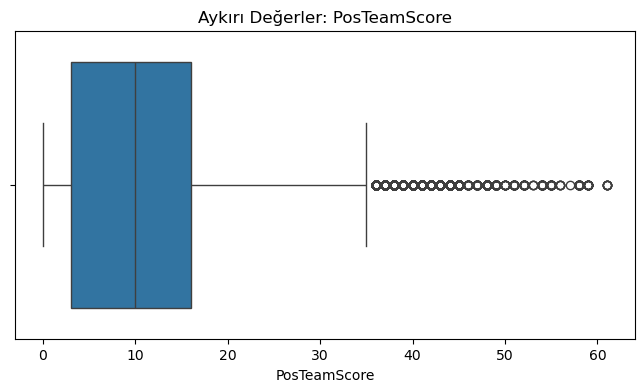

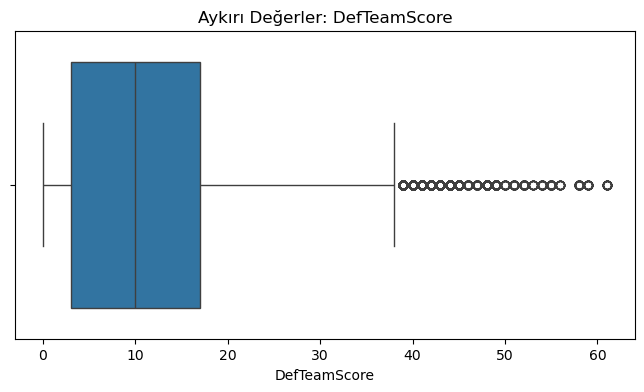

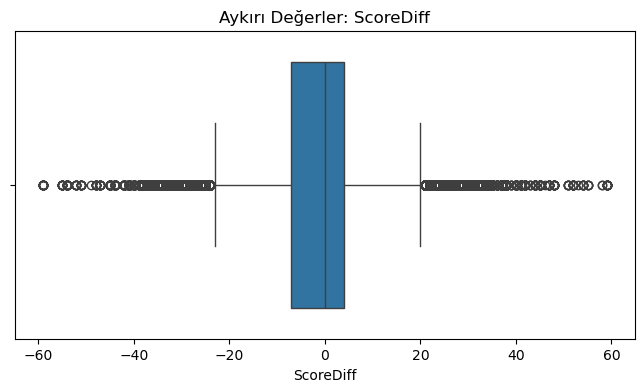

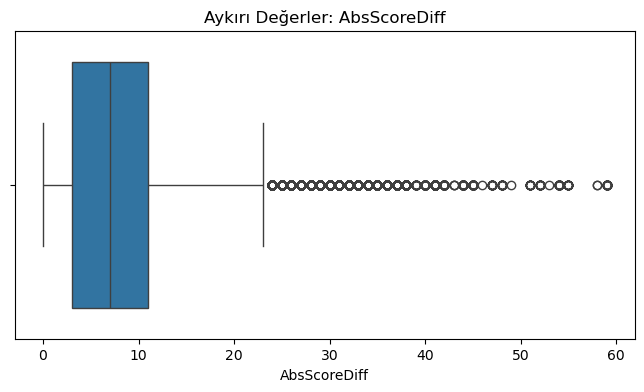

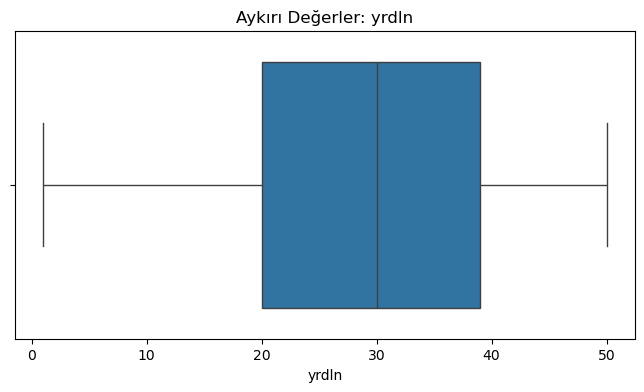

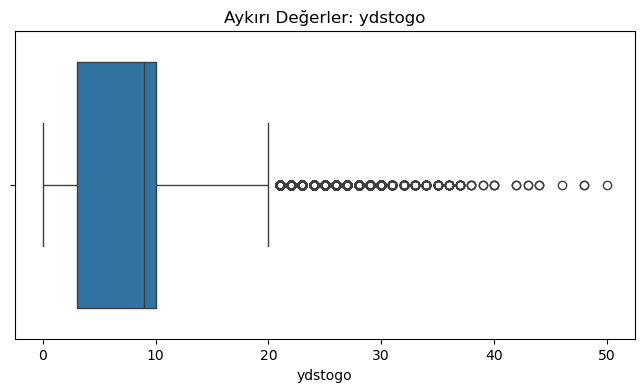

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["PosTeamScore", "DefTeamScore", "ScoreDiff", "AbsScoreDiff", "yrdln", "ydstogo"]

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Aykırı Değerler: {col}")
    plt.show()


=== Temel İstatistikler ===


,count,mean,std,min,25%,50%,75%,max
GameID,362447.0,2.012664e+09,2.292258e+06,2.009091e+09,2.011091e+09,2.013091e+09,2.015091e+09,2.017010e+09
Drive,362447.0,1.234709e+01,7.168173e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,3.500000e+01
qtr,362447.0,2.578231e+00,1.130259e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
down,362447.0,1.851454e+00,9.940702e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
TimeUnder,362447.0,7.386076e+00,4.642132e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,1.500000e+01
...,...,...,...,...,...,...,...,...
Win_Prob,362447.0,5.013111e-01,2.793264e-01,0.000000e+00,2.916558e-01,5.013111e-01,7.089611e-01,1.000000e+00
WPA,362447.0,2.163278e-03,4.502399e-02,-9.972143e-01,-1.429711e-02,0.000000e+00,1.438134e-02,9.948482e-01
airWPA,362447.0,1.520890e-02,3.527933e-02,-9.998808e-01,1.520890e-02,1.520890e-02,1.520890e-02,9.948482e-01
yacWPA,362447.0,-1.049184e-02,4.246883e-02,-9.866730e-01,-1.049184e-02,-1.049184e-02,-4.970173e-04,1.000000e+00



=== Boxplotlar ile Aykırı Değer Kontrolü ===


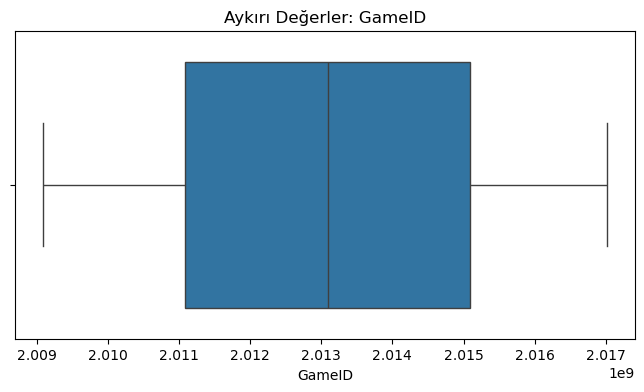

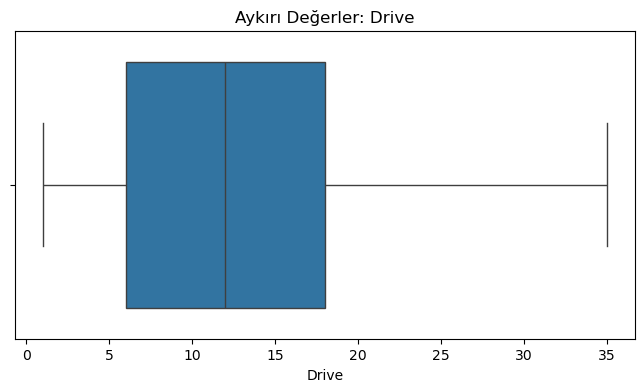

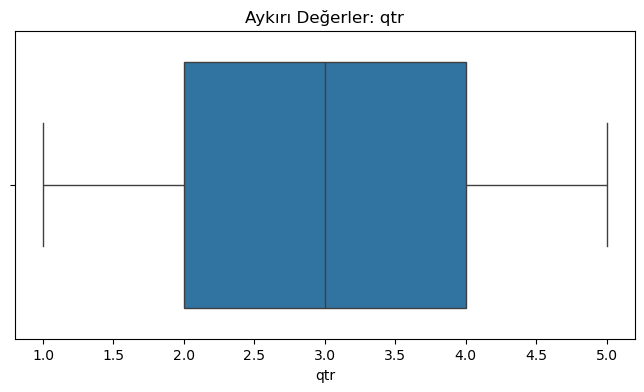

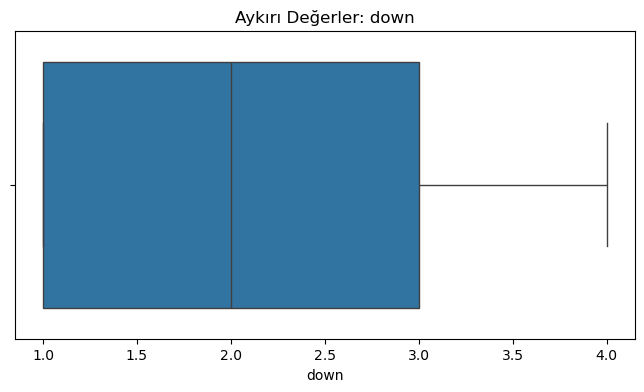

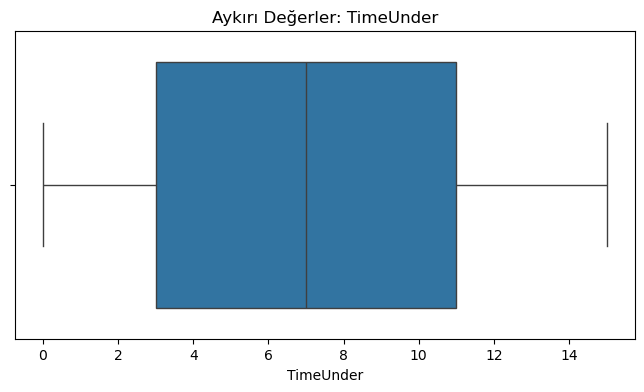

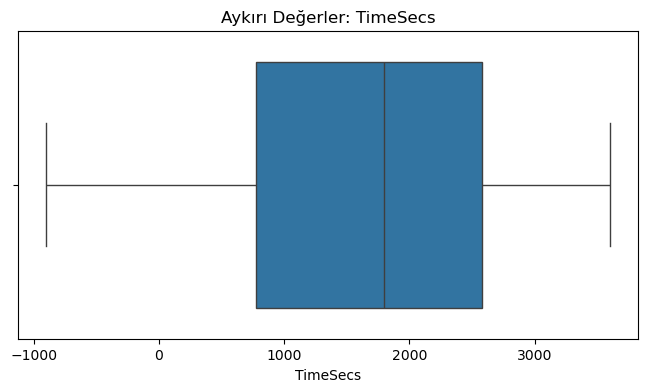

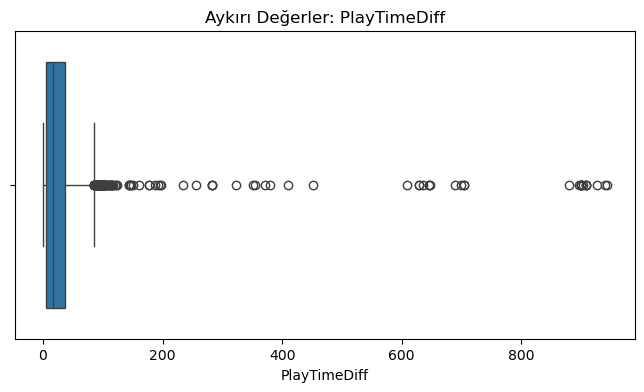

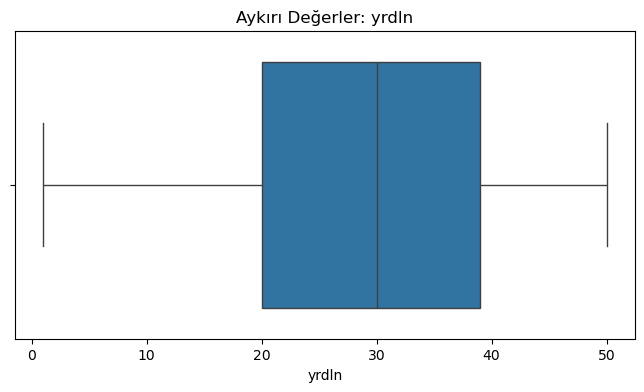

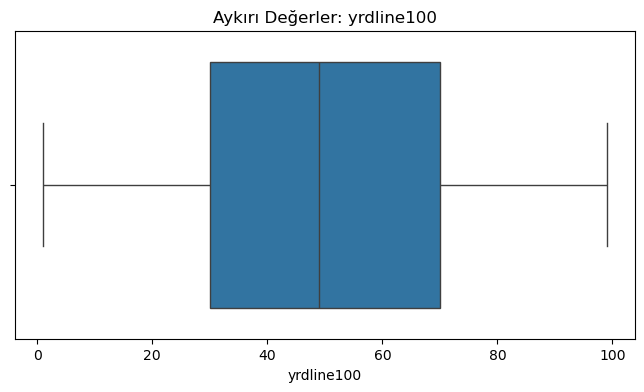

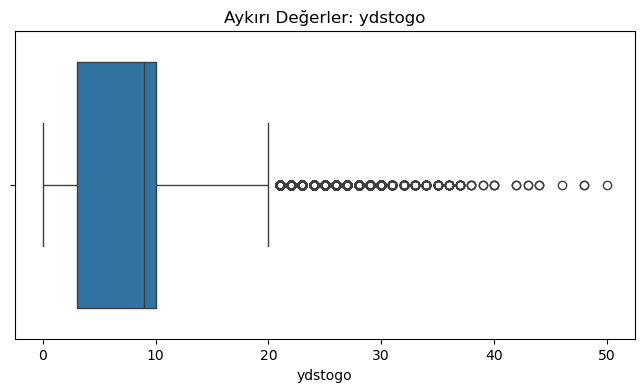

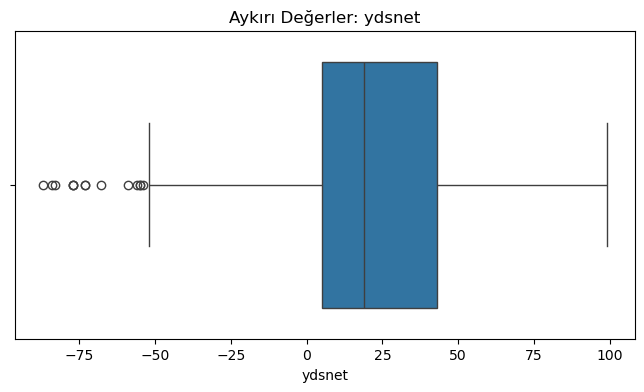

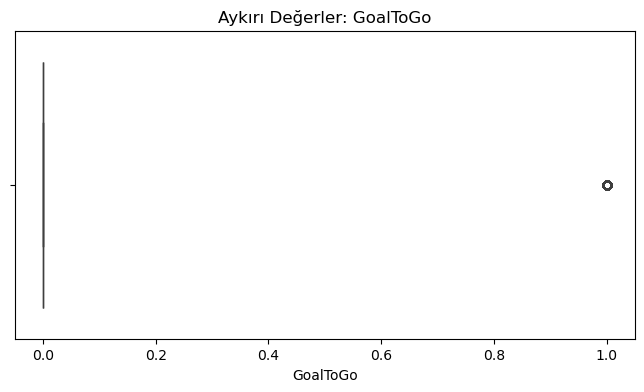

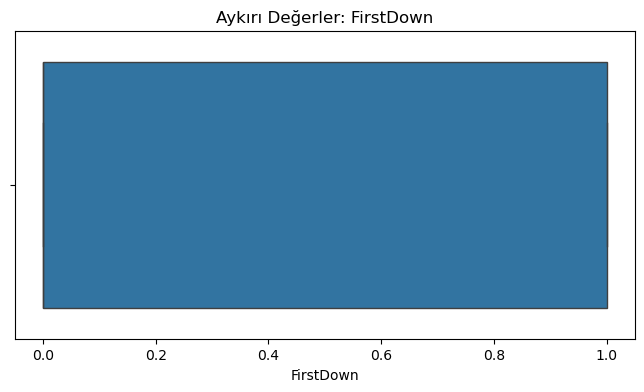

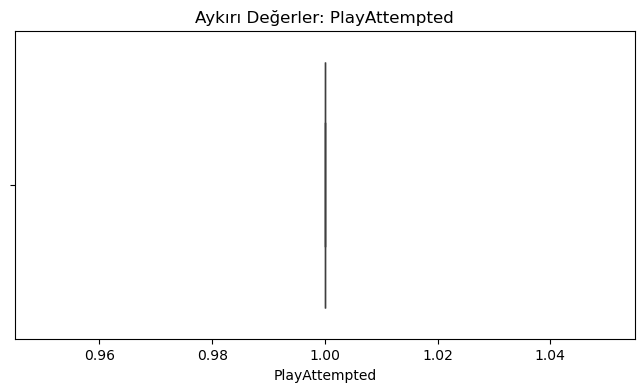

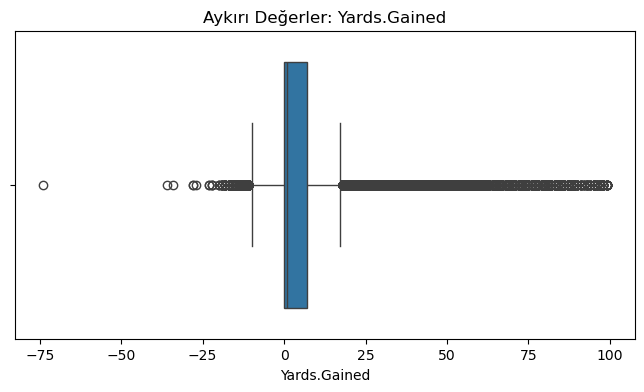

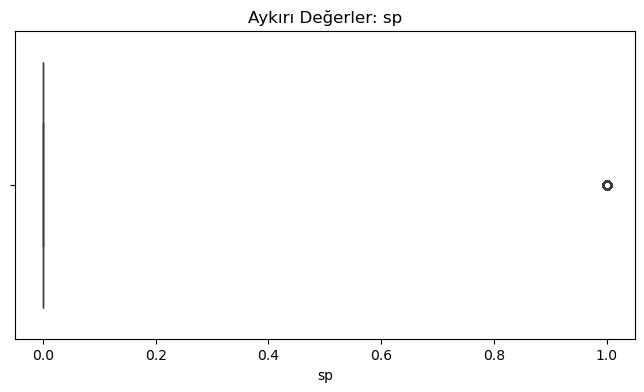

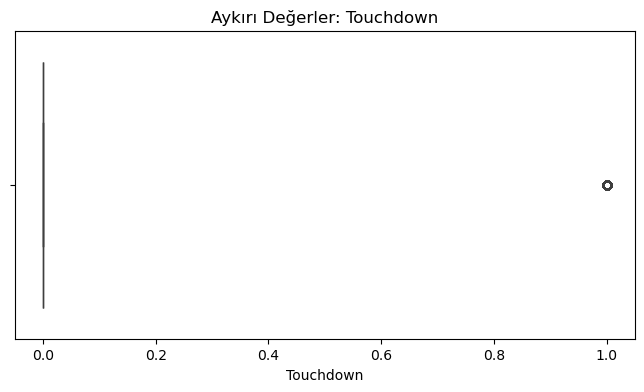

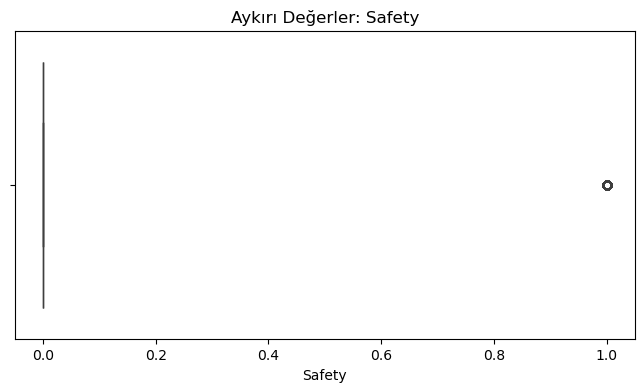

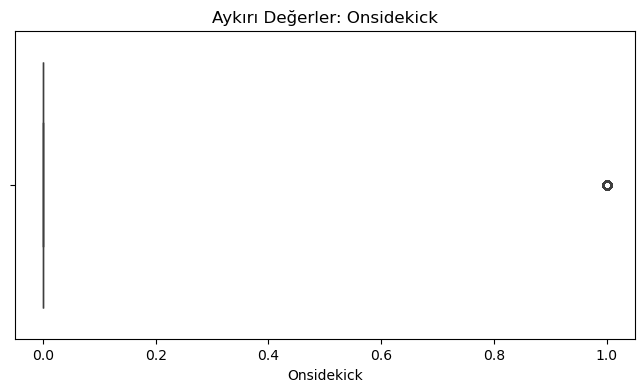

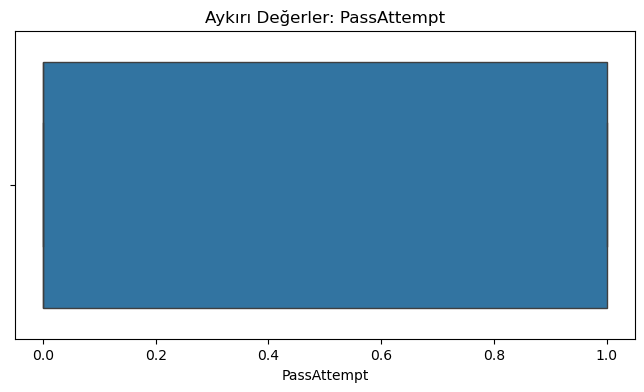

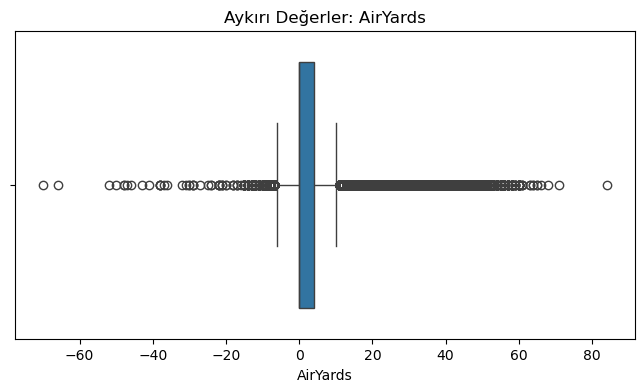

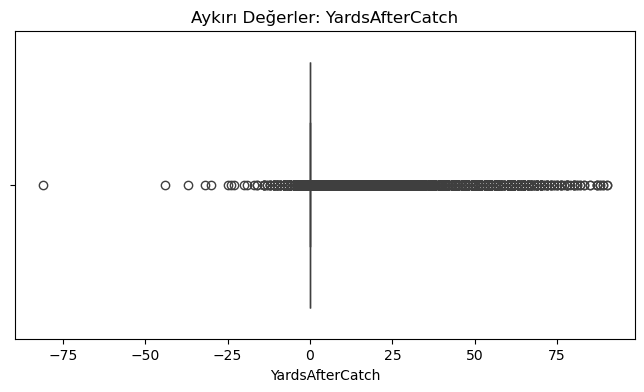

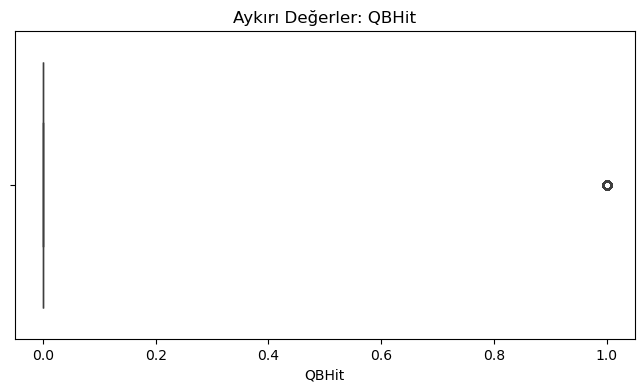

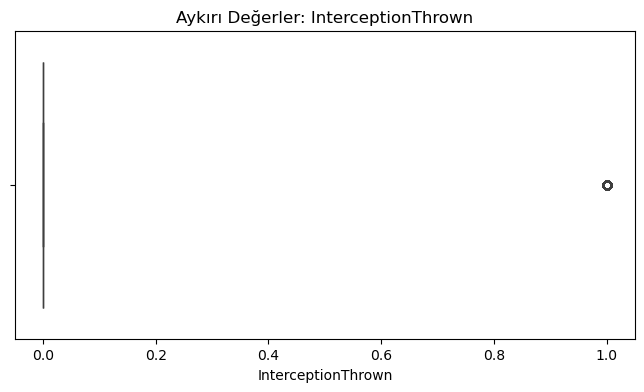

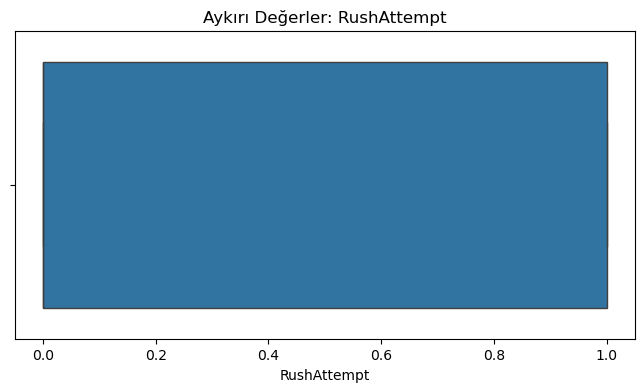

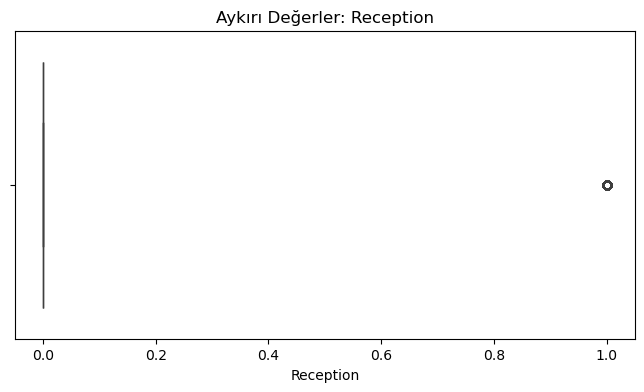

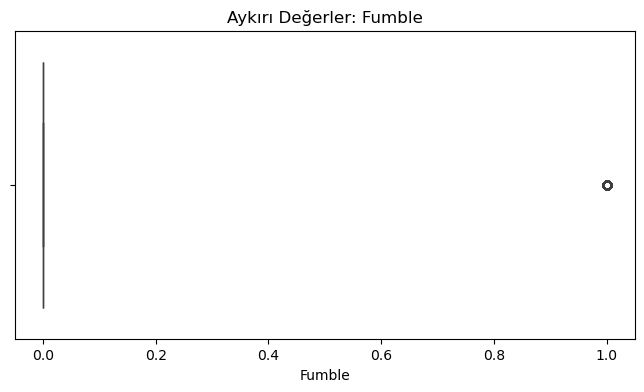

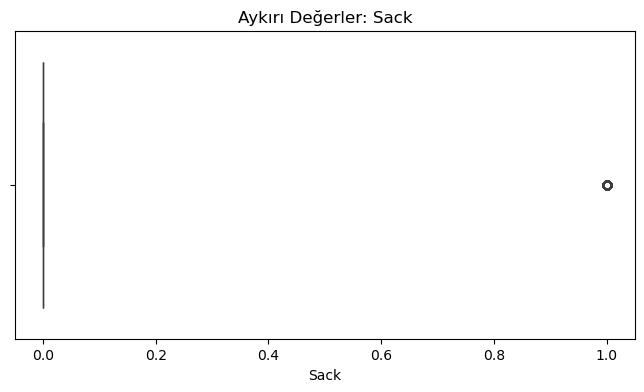

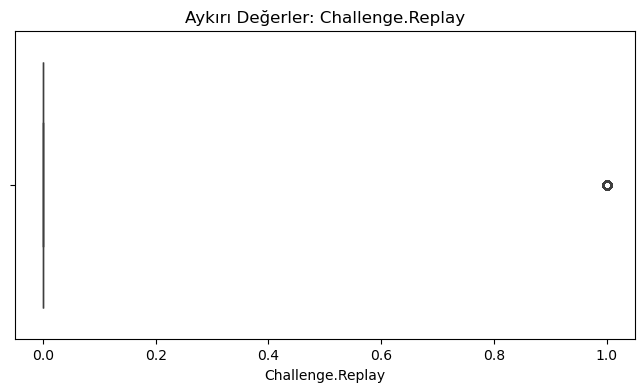

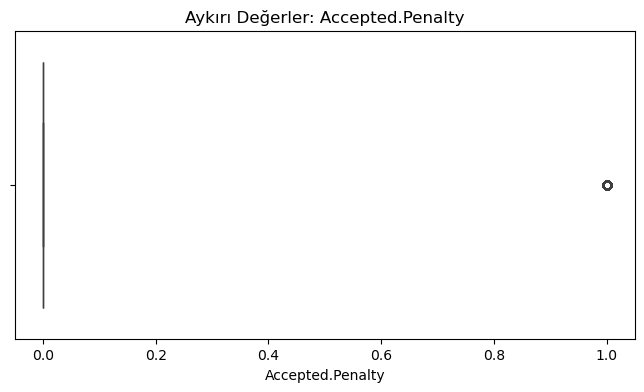

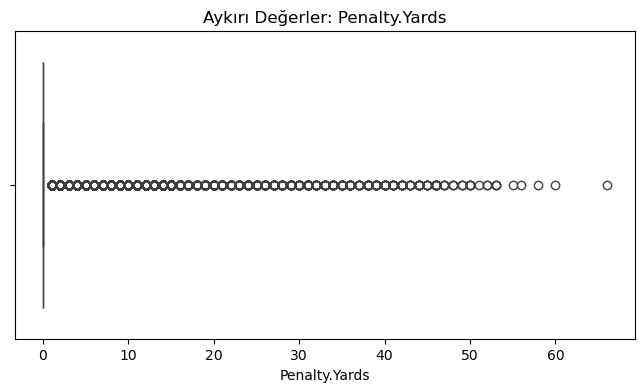

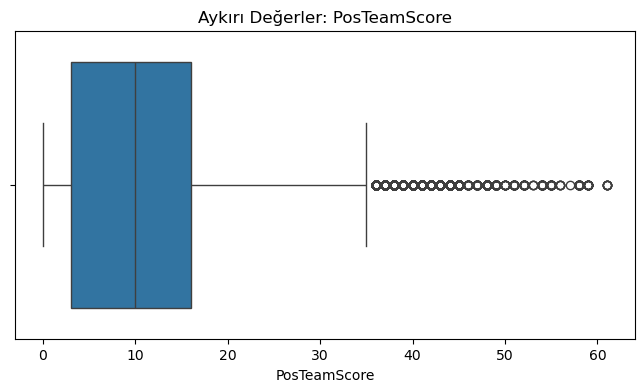

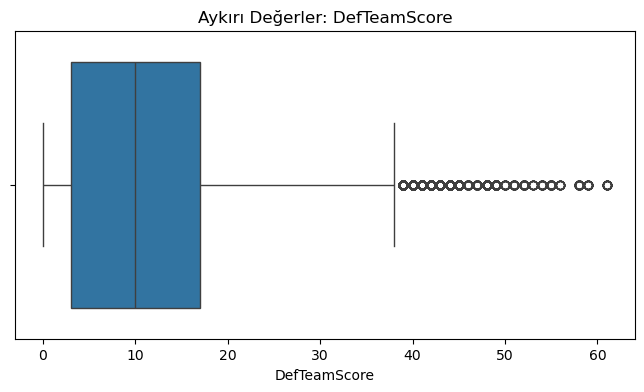

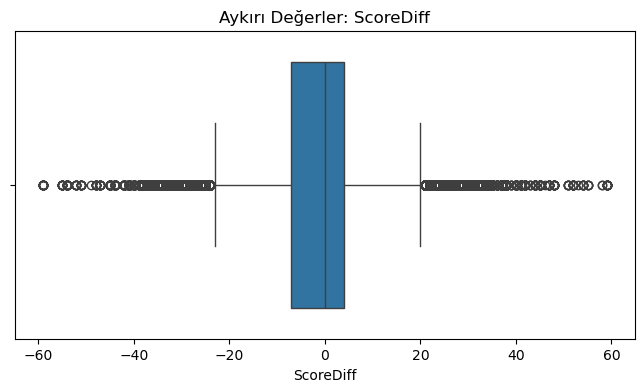

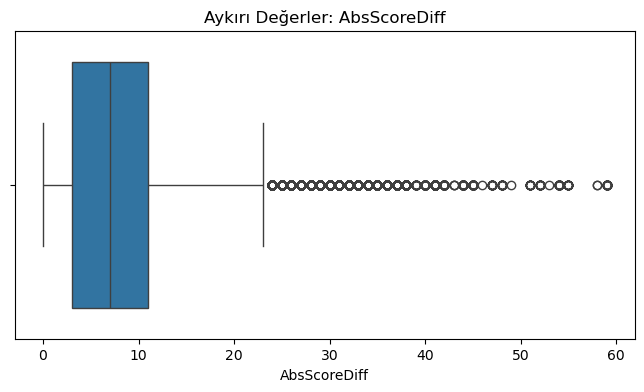

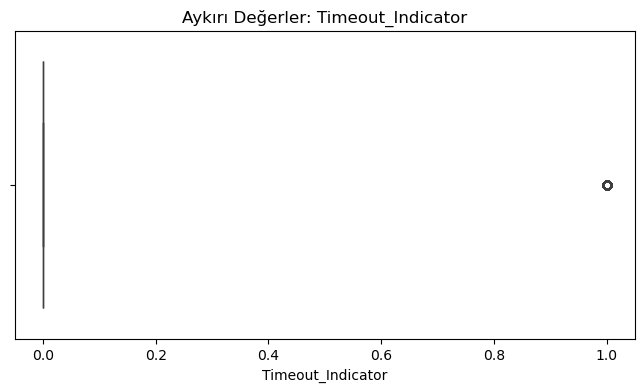

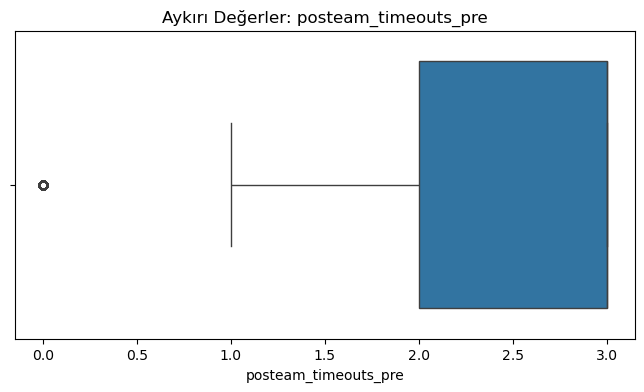

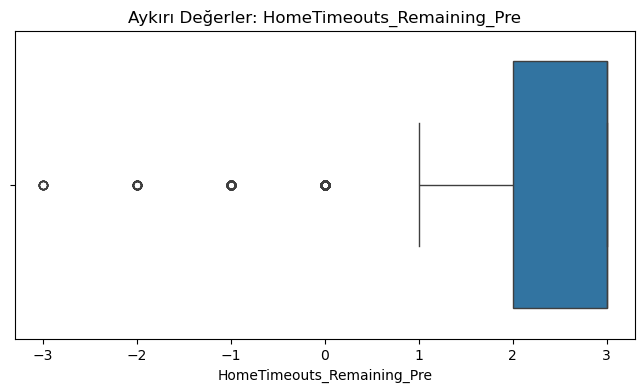

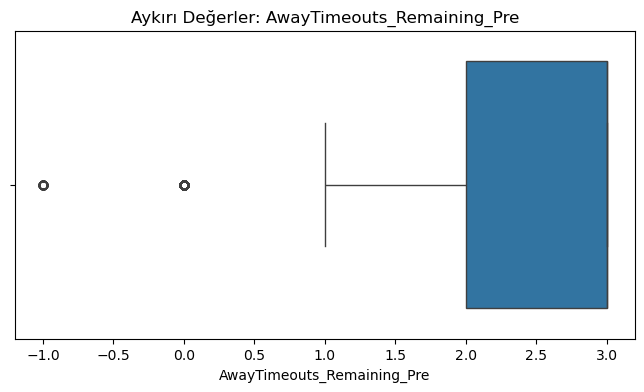

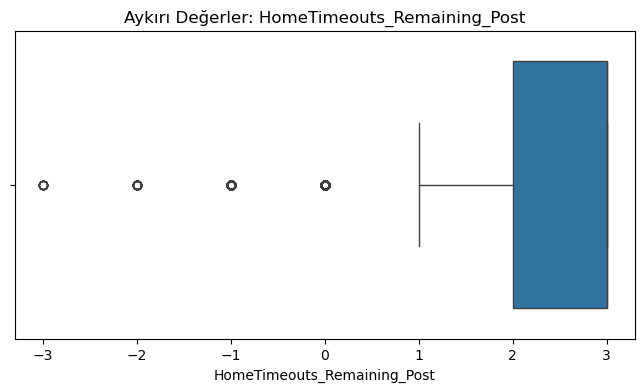

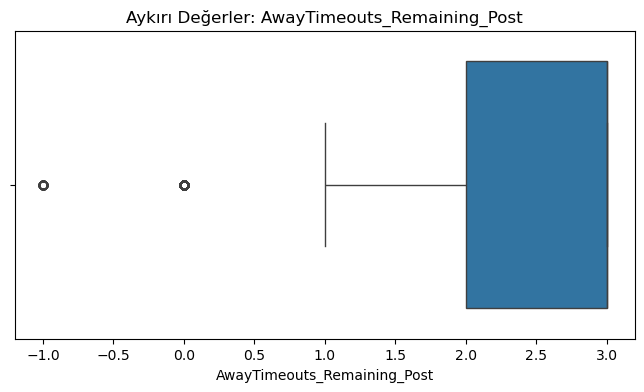

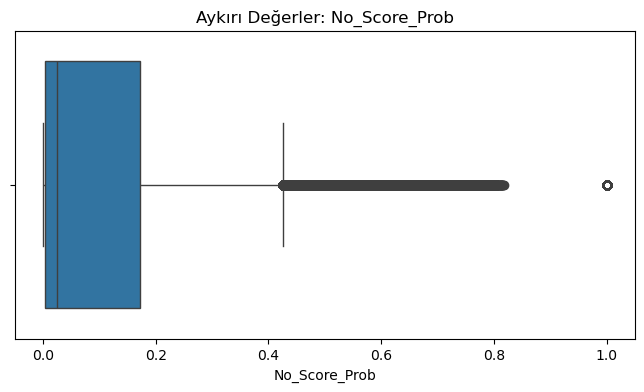

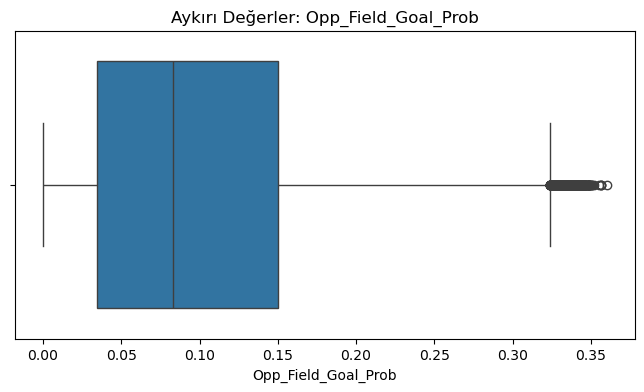

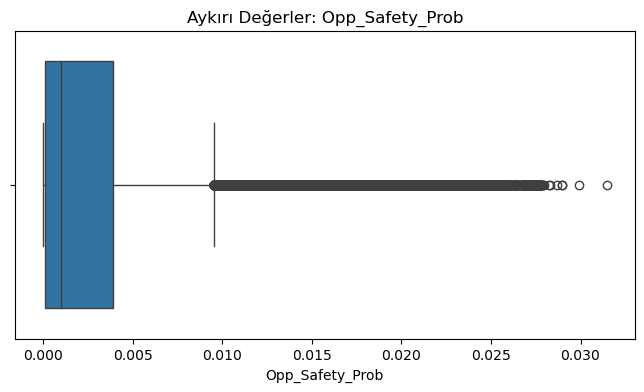

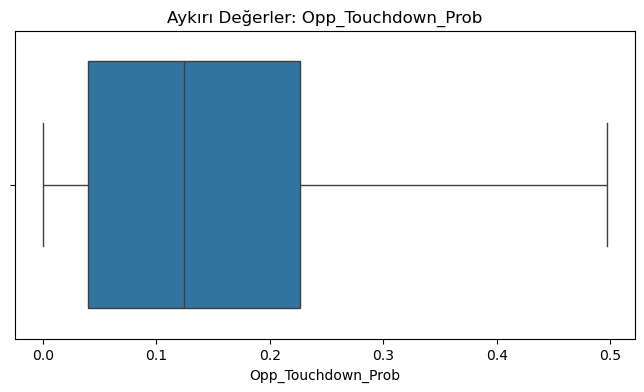

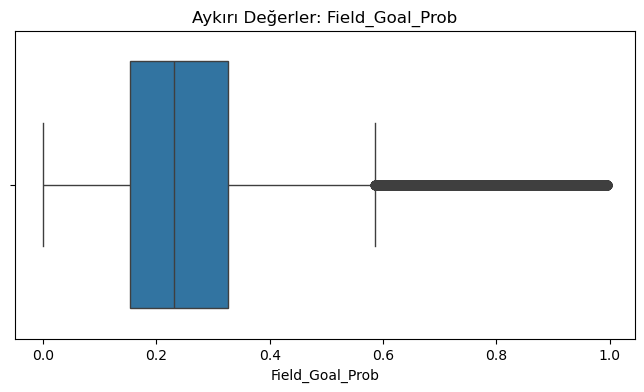

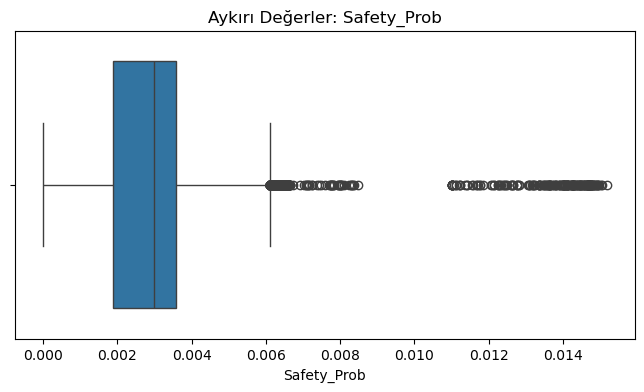

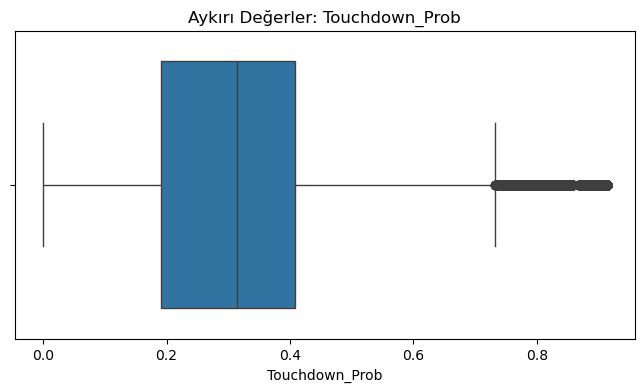

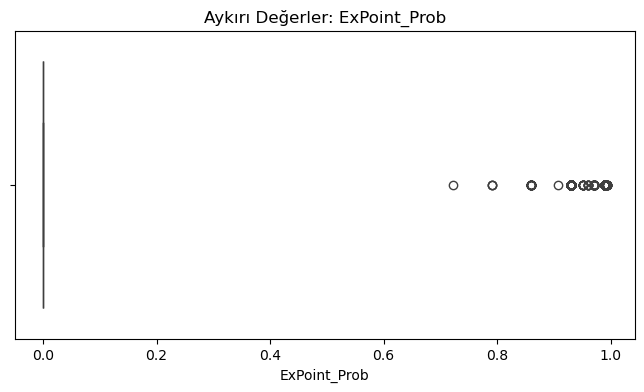

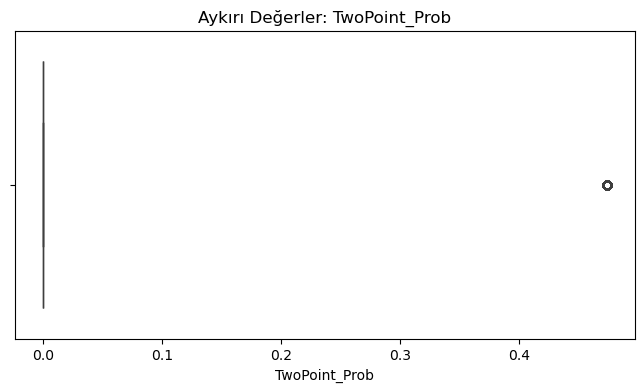

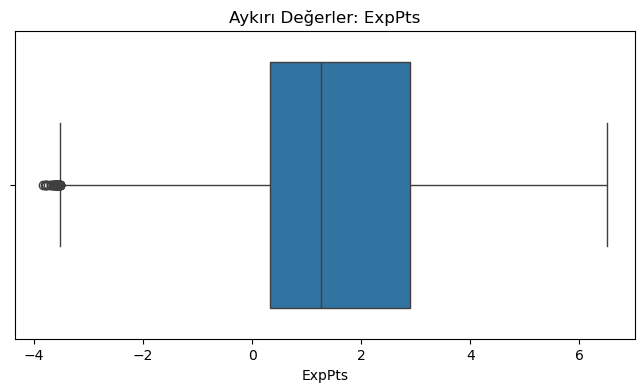

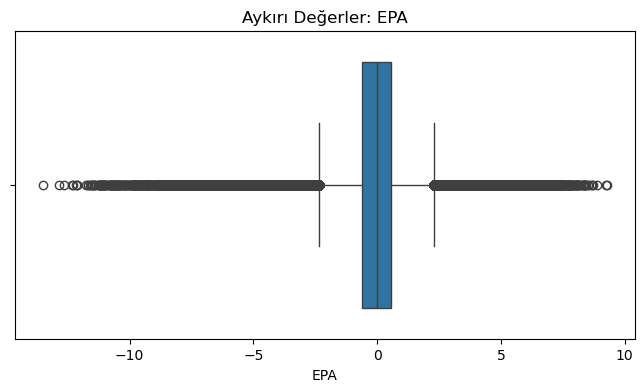

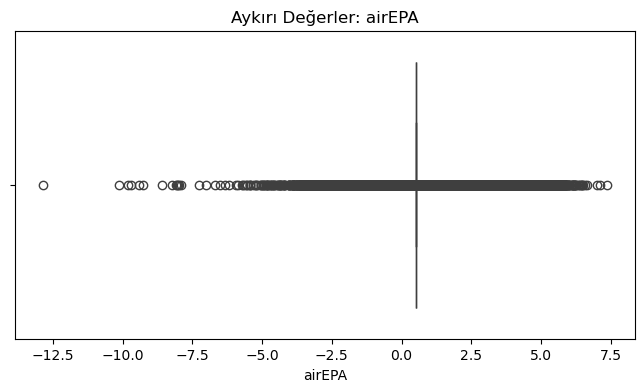

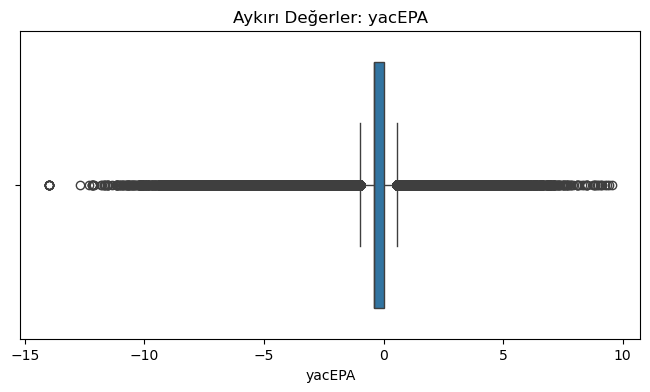

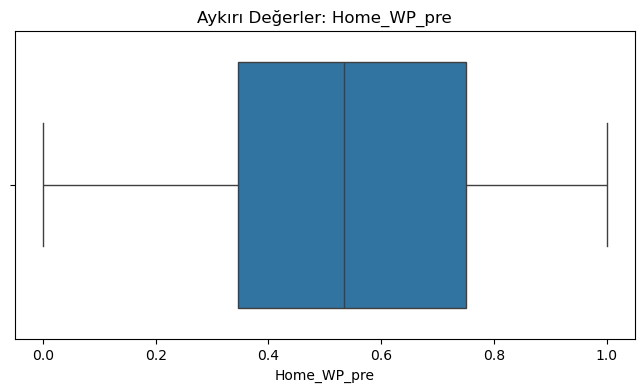

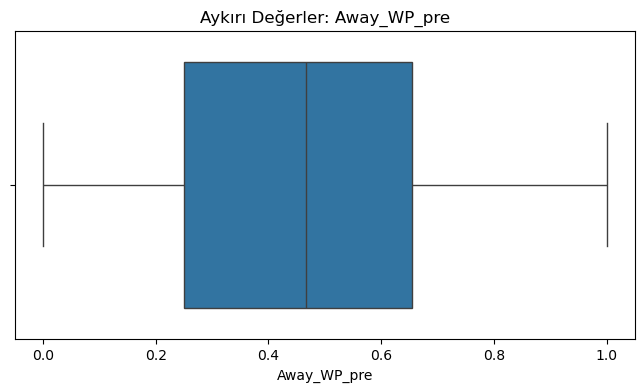

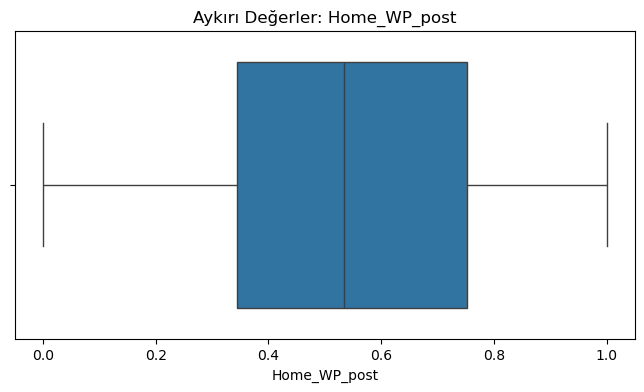

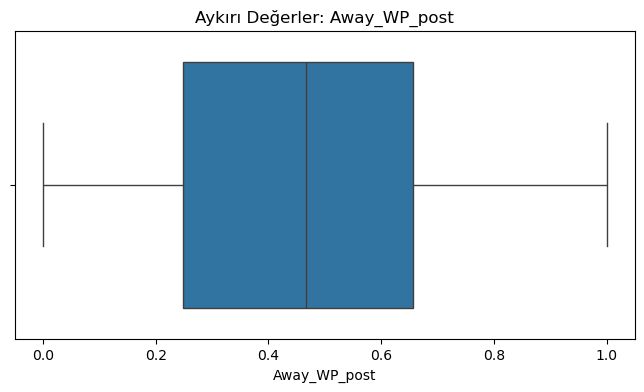

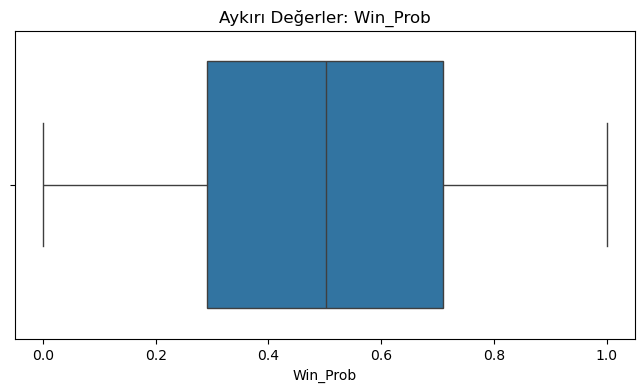

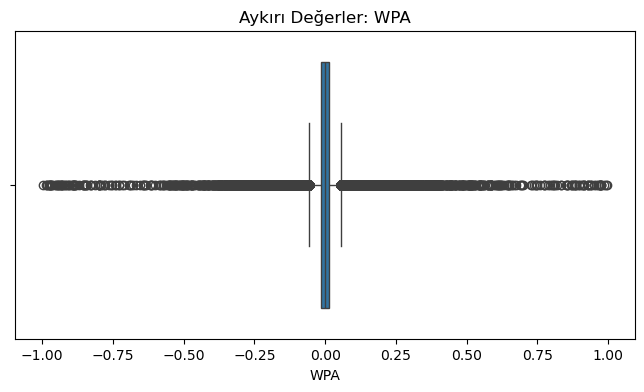

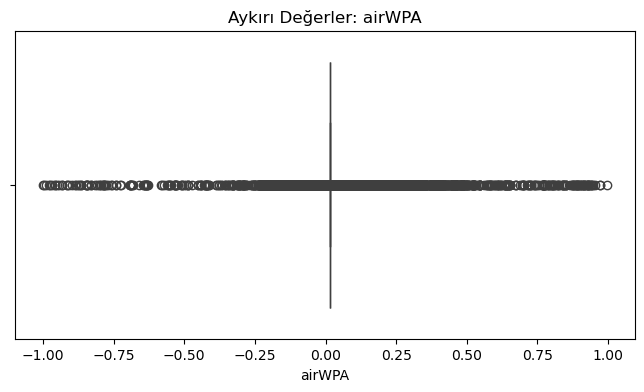

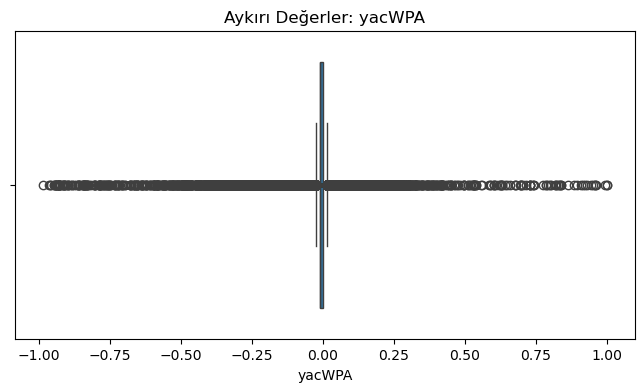

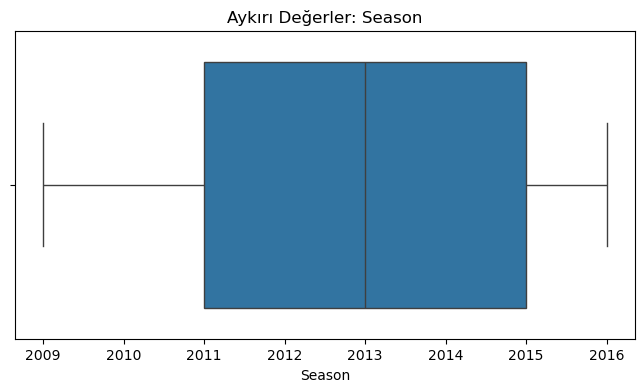


=== Potansiyel Aykırı Değer Sayısı ===
PlayTimeDiff: 129 potansiyel aykırı değer
ydstogo: 3343 potansiyel aykırı değer
ydsnet: 14 potansiyel aykırı değer
GoalToGo: 17877 potansiyel aykırı değer
Yards.Gained: 31064 potansiyel aykırı değer
sp: 26158 potansiyel aykırı değer
Touchdown: 10571 potansiyel aykırı değer
Safety: 142 potansiyel aykırı değer
Onsidekick: 496 potansiyel aykırı değer
AirYards: 44962 potansiyel aykırı değer
YardsAfterCatch: 67038 potansiyel aykırı değer
QBHit: 18976 potansiyel aykırı değer
InterceptionThrown: 4065 potansiyel aykırı değer
Reception: 90092 potansiyel aykırı değer
Fumble: 5173 potansiyel aykırı değer
Sack: 9820 potansiyel aykırı değer
Challenge.Replay: 2982 potansiyel aykırı değer
Accepted.Penalty: 26085 potansiyel aykırı değer
Penalty.Yards: 25859 potansiyel aykırı değer
PosTeamScore: 4588 potansiyel aykırı değer
DefTeamScore: 3738 potansiyel aykırı değer
ScoreDiff: 19806 potansiyel aykırı değer
AbsScoreDiff: 15921 potansiyel aykırı değer
Timeout_Indic

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1️⃣ Sayısal sütunları seç
# ----------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ----------------------------
# 2️⃣ Temel istatistikler
# ----------------------------
print("=== Temel İstatistikler ===")
display(df[num_cols].describe().T)

# ----------------------------
# 3️⃣ Aykırı değer görselleştirme (Boxplot)
# ----------------------------
print("\n=== Boxplotlar ile Aykırı Değer Kontrolü ===")
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Aykırı Değerler: {col}")
    plt.show()

# ----------------------------
# 4️⃣ Potansiyel aykırı değer sayısı
# ----------------------------
print("\n=== Potansiyel Aykırı Değer Sayısı ===")
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Sadece aykırı değeri olan sütunları göster
for col, count in outlier_summary.items():
    if count > 0:
        print(f"{col}: {count} potansiyel aykırı değer")


In [24]:
# Önemli kütüphaneler
import pandas as pd

# Temizlenecek sütunlar (sayısal ve analiz için kritik olanlar)
numeric_cols = [
    'PlayTimeDiff', 'ydstogo', 'ydsnet', 'GoalToGo', 'Yards.Gained', 'sp',
    'Touchdown', 'Safety', 'Onsidekick', 'AirYards', 'YardsAfterCatch',
    'QBHit', 'InterceptionThrown', 'Reception', 'Fumble', 'Sack',
    'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore',
    'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'Timeout_Indicator',
    'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
    'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
    'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
    'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob',
    'TwoPoint_Prob', 'ExpPts', 'EPA', 'airEPA', 'yacEPA', 'WPA', 'airWPA', 'yacWPA'
]

# Aykırı değerleri IQR yöntemiyle kırpma
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Aykırı değerler temizlendi. Veri artık daha dengeli.")


Aykırı değerler temizlendi. Veri artık daha dengeli.


=== Veri Özetleri ===
Boyut: (362447, 92)

Sütun tipleri:
 Date        datetime64[ns]
GameID               int64
Drive                int64
qtr                  int64
down                 int64
                 ...      
Win_Prob           float64
WPA                float64
airWPA             float64
yacWPA             float64
Season               int64
Length: 92, dtype: object

Eksik değerler:
 Date        0
GameID      0
Drive       0
qtr         0
down        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 92, dtype: int64

=== Temel İstatistikler ===
                                Date        GameID          Drive  \
count                         362447  3.624470e+05  362447.000000   
mean   2013-05-15 01:23:13.100784128  2.012664e+09      12.347088   
min              2009-09-10 00:00:00  2.009091e+09       1.000000   
25%              2011-09-11 00:00:00  2.011091e+09       6.000000   
50%              2013-09-08 00:00:00  2.013091e

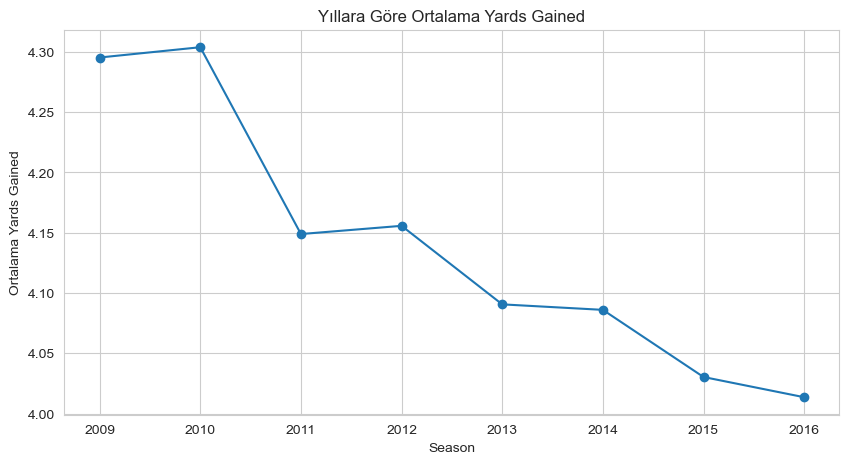

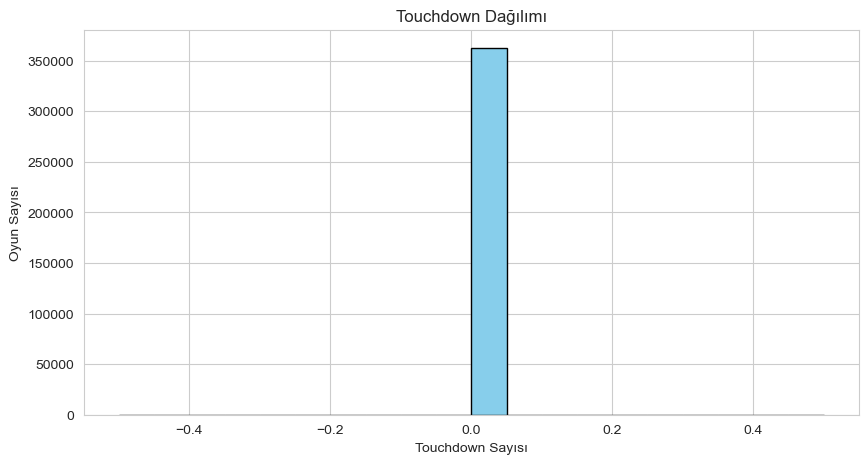

/var/folders/6d/0bhm1dr14bd36_28dbswmc_m0000gn/T/ipykernel_8073/4115140705.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ScoreDiff'], shade=True, color='red')


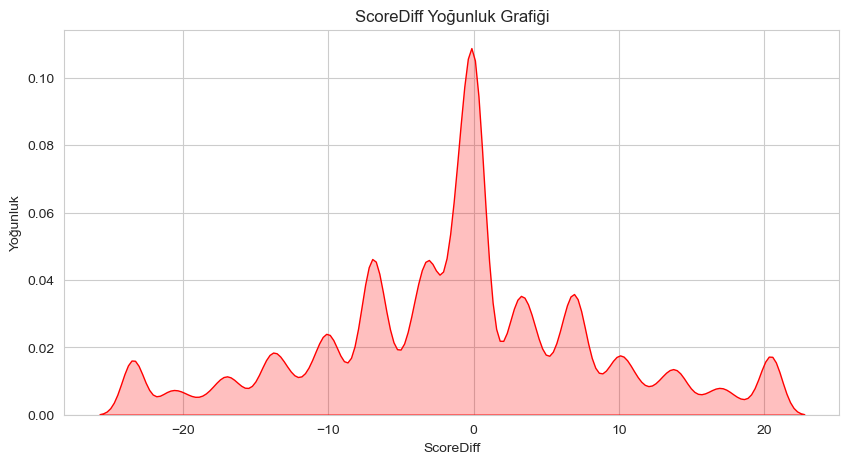

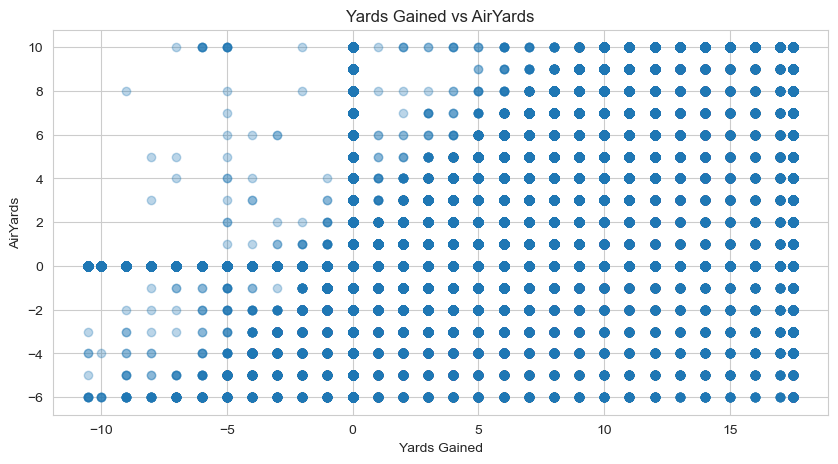


✅ Temizlenmiş veri 'cleaned_nfl_data.csv' olarak kaydedildi.


In [25]:
# ===============================
# NFL Veri Temizleme ve Analiz Raporu
# ===============================

# 1️⃣ Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stilleri
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# 2️⃣ Temiz veri yükle
# df = pd.read_csv("cleaned_nfl_data.csv")  # Eğer zaten temizlediysek
# veya ham veriyi yükleyip temizlemeyi buradan da yapabilirsin

# 3️⃣ Özet bilgiler
print("=== Veri Özetleri ===")
print("Boyut:", df.shape)
print("\nSütun tipleri:\n", df.dtypes)
print("\nEksik değerler:\n", df.isna().sum())

# 4️⃣ Temel istatistikler
print("\n=== Temel İstatistikler ===")
print(df.describe())

# 5️⃣ Analiz ve görselleştirmeler

# 5a) Yıllara göre ortalama Yards Gained
yards_by_season = df.groupby('Season')['Yards.Gained'].mean()
plt.plot(yards_by_season.index, yards_by_season.values, marker='o')
plt.title("Yıllara Göre Ortalama Yards Gained")
plt.xlabel("Season")
plt.ylabel("Ortalama Yards Gained")
plt.grid(True)
plt.show()

# 5b) Touchdown sayıları dağılımı
plt.hist(df['Touchdown'], bins=20, color='skyblue', edgecolor='black')
plt.title("Touchdown Dağılımı")
plt.xlabel("Touchdown Sayısı")
plt.ylabel("Oyun Sayısı")
plt.show()

# 5c) ScoreDiff yoğunluk grafiği
sns.kdeplot(df['ScoreDiff'], shade=True, color='red')
plt.title("ScoreDiff Yoğunluk Grafiği")
plt.xlabel("ScoreDiff")
plt.ylabel("Yoğunluk")
plt.show()

# 5d) Yards Gained vs AirYards
plt.scatter(df['Yards.Gained'], df['AirYards'], alpha=0.3)
plt.title("Yards Gained vs AirYards")
plt.xlabel("Yards Gained")
plt.ylabel("AirYards")
plt.show()

# 6️⃣ CSV olarak kaydet
df.to_csv("cleaned_nfl_data.csv", index=False)
print("\n✅ Temizlenmiş veri 'cleaned_nfl_data.csv' olarak kaydedildi.")
